In [246]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
# read file
df = pd.read_csv("data_netsuite.csv", index_col='Estimate')
# clean data
### clean col names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\(', '_').str.replace('\)', '_')
### format date col
df['date'] = pd.to_datetime(df['date'])
### only include cars with KCapital
df =  df[df['financiamiento_ganado'] == 'Yes']
### select relevant cols
df = df[['date', 'cotizar_kavak_total', 'autorizacion_del_cliente']]
# examine data
print(df.shape)
df.head()

(715, 3)


,date,cotizar_kavak_total,autorizacion_del_cliente
Estimate,,,
1968942,2020-08-01,No,No
1969160,2020-08-01,No,No
1969283,2020-08-01,No,No
1969677,2020-08-01,No,No
1969976,2020-08-01,No,No


<BarContainer object of 4 artists>

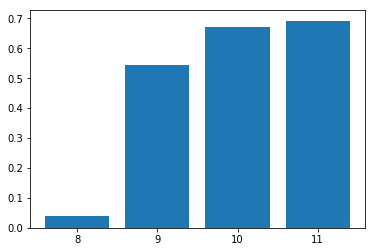

In [248]:
# Graph 1: Monthly report
### create month col
df['month'] = df['date'].dt.month
### extract unnique months
months = df['month'].unique()
### initialize dic
monthly_data = {}
### calculate monthly percentage
for i in months:
    kcapital = 0
    ktotal = 0
    for j in range(df.shape[0]):
            if(df['month'].iloc[j] == i): 
                kcapital += 1
                if((df['cotizar_kavak_total'].iloc[j] == 'Yes') & 
                   (df['autorizacion_del_cliente'].iloc[j] == 'Yes')): ktotal += 1
    monthly_data[i] = float(ktotal)/float(kcapital)
### create bar chart 
keys_month = monthly_data.keys()
values_month = monthly_data.values()
plt.xticks(months)
plt.bar(keys_month, values_month)

<BarContainer object of 15 artists>

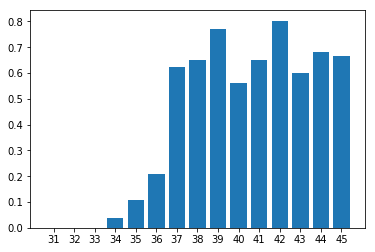

In [249]:
# Graph 2: Weekly report
df['week'] = df['date'].dt.week
### extract unnique weeks
weeks = df['week'].unique()
### initialize dic
weekly_data = {}
### calculate weekly percentage
for i in weeks:
    kcapital = 0
    ktotal = 0
    for j in range(df.shape[0]):
            if(df['week'].iloc[j] == i): 
                kcapital += 1
                if((df['cotizar_kavak_total'].iloc[j] == 'Yes') & 
                   (df['autorizacion_del_cliente'].iloc[j] == 'Yes')): ktotal += 1
    weekly_data[i] = float(ktotal)/float(kcapital)
### create bar chart 
keys_week = weekly_data.keys()
values_week = weekly_data.values()
plt.xticks(weeks)
plt.bar(keys_week, values_week)